# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ilyas imam ibrahim
- **Email:** ilyasmules.9803@gmail.com
- **ID Dicoding:** MC009D5Y2044

## Menentukan Pertanyaan Bisnis

- Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [128]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [129]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Faktor paling berpengaruh terhadap jumlah penyewaan sepeda adalah Hari kerja atau akhir pekan
- Cuaca cerah meningkatkan jumlah peminjaman.
- Hujan dan angin kencang mengurangi jumlah peminjaman secara drastis.x

### Assessing Data

### Menilai tabel day.df

In [130]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [131]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [132]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour.df

In [133]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [134]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [135]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jam, musim, dan cuaca adalah faktor utama yang mempengaruhi penyewaan sepeda.
- Hari kerja lebih tinggi penyewaannya dibanding hari libur, terutama oleh pengguna terdaftar.
- Penyewaan tertinggi terjadi di musim panas dan lebih rendah saat hujan/cuaca buruk.



### Cleaning Data

Menyesuaikan format data (konversi tanggal)

In [136]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [137]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

day_df['season'] = day_df['season'].map(season_mapping).astype('category')
day_df['weekday'] = day_df['weekday'].map(weekday_mapping).astype('category')
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping).astype('category')


In [138]:
hour_df['season'] = hour_df['season'].fillna(hour_df['season'].mode()[0])
hour_df['weekday'] = hour_df['weekday'].fillna(hour_df['weekday'].mode()[0])
hour_df['weathersit'] = hour_df['weathersit'].fillna(hour_df['weathersit'].mode()[0])


Menghapus data duplikat

In [141]:
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

 Menghapus atau menangani missing values

In [142]:
day_df.fillna(day_df.median(numeric_only=True), inplace=True)
hour_df.fillna(hour_df.median(numeric_only=True), inplace=True)

Menangani outlier pada windspeed (kecepatan angin)

In [143]:
median_windspeed = hour_df.groupby("weathersit")["windspeed"].median()
hour_df.loc[hour_df["windspeed"] == 0, "windspeed"] = hour_df["weathersit"].map(median_windspeed)


In [146]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(3), datetime64

**Insight:**
- Dataset sudah bersih dan siap digunakan untuk analisis tanpa risiko bias akibat missing values.
- Dengan mengganti nilai outlier secara logis, hasil analisis nanti akan lebih akurat dan tidak terdistorsi oleh nilai ekstrem yang salah.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [27]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
303,304,2011-10-31,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,3669
87,88,2011-03-29,2,0,3,0,2,1,1,0.302500,0.292908,0.314167,0.226996,317,2108,2425
431,432,2012-03-07,1,1,3,0,3,1,1,0.404167,0.385100,0.513333,0.345779,432,4484,4916
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843


In [28]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [29]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_mapping)

print("\nStatistik Peminjaman Berdasarkan Musim:")
print(day_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Musim:
         max   min         mean          std  count
season                                             
Fall    8714  1115  5644.303191  1459.800381    188
Spring  7836   431  2604.132597  1399.942119    181
Summer  8362   795  4992.331522  1695.977235    184
Winter  8555    22  4728.162921  1699.615261    178


In [30]:
weather_mapping = {1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain"}
day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)

print("\nStatistik Peminjaman Berdasarkan Kondisi Cuaca:")
print(day_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Kondisi Cuaca:
                  max  min         mean          std  count
weathersit                                                 
Clear            8714  431  4876.786177  1879.483989    463
Light Rain/Snow  4639   22  1803.285714  1240.284449     21
Misty/Cloudy     8362  605  4035.862348  1809.109918    247


In [31]:
print("\nTotal Peminjaman Berdasarkan Hari Kerja:")
print(day_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari Kerja:
workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [32]:
day_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu:")
print(day_df.groupby(day_df['weekday'].map(day_map))['cnt'].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari dalam Seminggu:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [33]:
print("\nTotal Peminjaman Berdasarkan Hari Libur:")
print(day_df.groupby(by="holiday")["cnt"].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari Libur:
holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [34]:
workingday_rentals = day_df.groupby("workingday")[["casual", "registered"]].sum()
workingday_rentals.index = workingday_rentals.index.map({0: "Hari Libur/Weekend", 1: "Hari Kerja"})

print("\nTotal Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:")
print(workingday_rentals)


Total Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:
                    casual  registered
workingday                            
Hari Libur/Weekend  316732      683537
Hari Kerja          303285     1989125


In [35]:
weekly_rentals = day_df.groupby("weekday")[["casual", "registered"]].sum().reset_index()

weekly_rentals["weekday"] = weekly_rentals["weekday"].map(day_map)


weekly_rentals = weekly_rentals.set_index("weekday").reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

print("\nTotal Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):")
print(weekly_rentals)


Total Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):
           casual  registered
weekday                      
Monday      70784      384719
Tuesday     57843      411266
Wednesday   57319      415729
Thursday    61460      423935
Friday      78238      409552
Saturday   153852      323955
Sunday     140521      303506


In [36]:
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

monthly_rentals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

monthly_rentals['yr'] = monthly_rentals['yr'].map({0: 2011, 1: 2012})

monthly_rentals['mnth'] = monthly_rentals['mnth'].map(month_mapping)

print("\nTotal Peminjaman Setiap Bulan dalam Setiap Tahun:")
print(monthly_rentals)


Total Peminjaman Setiap Bulan dalam Setiap Tahun:
      yr mnth     cnt
0   2011  Jan   38189
1   2011  Feb   48215
2   2011  Mar   64045
3   2011  Apr   94870
4   2011  May  135821
5   2011  Jun  143512
6   2011  Jul  141341
7   2011  Aug  136691
8   2011  Sep  127418
9   2011  Oct  123511
10  2011  Nov  102167
11  2011  Dec   87323
12  2012  Jan   96744
13  2012  Feb  103137
14  2012  Mar  164875
15  2012  Apr  174224
16  2012  May  195865
17  2012  Jun  202830
18  2012  Jul  203607
19  2012  Aug  214503
20  2012  Sep  218573
21  2012  Oct  198841
22  2012  Nov  152664
23  2012  Dec  123713


### Explore hour_df

In [37]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12654,12655,2012-06-16,2,1,6,11,0,6,0,1,0.66,0.6212,0.39,0.1642,213.0,353.0,566.0
14636,14637,2012-09-07,3,1,9,1,0,5,1,1,0.62,0.5606,0.88,0.1045,10.0,19.0,29.0
3163,3164,2011-05-16,2,0,5,17,0,1,1,1,0.58,0.5455,0.88,0.2239,47.0,227.0,274.0
3636,3637,2011-06-05,2,0,6,10,0,0,0,2,0.62,0.5909,0.73,0.0896,83.0,168.0,251.0
13138,13139,2012-07-06,3,1,7,15,0,5,1,1,0.92,0.8182,0.29,0.1940,79.0,206.0,285.0


In [38]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15787.000000,15787,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000
mean,7894.000000,2011-11-29 19:08:17.801988864,2.400329,0.452398,6.049154,11.545575,0.027174,2.998733,0.685627,1.414138,0.512642,0.489450,0.626009,0.213638,36.712593,152.213100,188.925694
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,3947.500000,2011-06-18 00:00:00,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.470000,0.134300,4.000000,34.000000,40.000000
50%,7894.000000,2011-11-30 00:00:00,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.540000,0.500000,0.630000,0.194000,17.000000,114.000000,141.000000
75%,11840.500000,2012-05-13 00:00:00,3.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,50.000000,218.000000,280.000000
max,15787.000000,2012-10-24 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,4557.458685,NaN,1.054511,0.497745,3.220357,6.913412,0.162596,2.002943,0.464280,0.639724,0.193177,0.172296,0.194823,0.099327,50.043023,150.410195,181.542286


In [39]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df["season"] = hour_df["season"].map(season_mapping)

print("\nStatistik Peminjaman Berdasarkan Musim:")
print(hour_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Musim:
          max  min        mean         std  count
season                                           
Fall    977.0  1.0  236.016237  197.711630   4496
Spring  801.0  1.0  113.251256  121.130586   3980
Summer  957.0  1.0  208.344069  188.362473   4409
Winter  967.0  1.0  190.252671  181.295248   2901


In [41]:
weather_mapping = {1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain"}
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)

print("\nStatistik Peminjaman Berdasarkan Kondisi Cuaca:")
print(hour_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Kondisi Cuaca:
                   max   min        mean         std  count
weathersit                                                 
Clear            977.0   1.0  204.410851  189.906148  10561
Heavy Rain       164.0  23.0   74.333333   77.925178      3
Light Rain/Snow  891.0   1.0  113.095712  135.409426   1306
Misty/Cloudy     957.0   1.0  172.541369  163.239252   3916


In [40]:
day_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu:")
print(hour_df.groupby(hour_df['weekday'].map(day_map))['cnt'].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari dalam Seminggu:
weekday
Thursday     436393.0
Friday       435894.0
Saturday     431465.0
Tuesday      429963.0
Wednesday    429667.0
Monday       413729.0
Sunday       405270.0
Name: cnt, dtype: float64


In [42]:
print("\nTotal Peminjaman Berdasarkan Jam:")
print(hour_df.groupby("hr")["cnt"].sum())


Total Peminjaman Berdasarkan Jam:
hr
0      35520.0
1      21706.0
2      14831.0
3       7454.0
4       3948.0
5      12705.0
6      49949.0
7     139210.0
8     233716.0
9     143013.0
10    113841.0
11    136313.0
12    165610.0
13    165787.0
14    157342.0
15    163765.0
16    204816.0
17    307028.0
18    283732.0
19    208467.0
20    151746.0
21    115482.0
22     88112.0
23     58288.0
Name: cnt, dtype: float64


In [43]:
print("\nTotal Peminjaman Berdasarkan Hari Kerja:")
print(hour_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False))


Total Peminjaman Berdasarkan Hari Kerja:
workingday
1    2076918.0
0     905463.0
Name: cnt, dtype: float64


In [44]:
workingday_rentals = hour_df.groupby("workingday")[["casual", "registered"]].sum()
workingday_rentals.index = workingday_rentals.index.map({0: "Hari Libur/Weekend", 1: "Hari Kerja"})

print("\nTotal Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:")
print(workingday_rentals)


Total Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:
                      casual  registered
workingday                              
Hari Libur/Weekend  295035.0    610428.0
Hari Kerja          284510.0   1792408.0


In [45]:
hourly_rentals = hour_df.groupby("hr")[["casual", "registered"]].sum()

print("\nTotal Peminjaman Setiap Jam dalam Sehari (Casual & Registered):")
print(hourly_rentals)


Total Peminjaman Setiap Jam dalam Sehari (Casual & Registered):
     casual  registered
hr                     
0    7006.0     28514.0
1    4399.0     17307.0
2    3207.0     11624.0
3    1765.0      5689.0
4     808.0      3140.0
5     956.0     11749.0
6    2873.0     47076.0
7    7656.0    131554.0
8   14778.0    218938.0
9   20843.0    122170.0
10  31402.0     82439.0
11  40096.0     96217.0
12  45768.0    119842.0
13  48399.0    117388.0
14  50488.0    106854.0
15  50265.0    113500.0
16  49969.0    154847.0
17  51180.0    255848.0
18  42581.0    241151.0
19  34099.0    174368.0
20  25386.0    126360.0
21  19624.0     95858.0
22  15460.0     72652.0
23  10537.0     47751.0


### Explore All Data

### menghubungkan semua data

In [156]:
all_data = hour_df.merge(day_df, on="dteday", suffixes=("_hour", "_day"))


Menampilkan informasi dataset

In [157]:
print("Informasi dataset harian:")
print(day_df.info())
print("\nInformasi dataset per jam:")
print(hour_df.info())

Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtype

Menampilkan statistik deskriptif

In [50]:
print("\nStatistik deskriptif dataset harian:")
print(day_df.describe())


Statistik deskriptif dataset harian:
          instant               dteday          yr        mnth     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

       workingday        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    0.495385    0.474354    0.627894    0.190486   
min      0.000000    0.059130    0.079070    0.00000

In [51]:
print("\nStatistik deskriptif dataset per jam:")
print(hour_df.describe())


Statistik deskriptif dataset per jam:
            instant                         dteday            yr  \
count  15787.000000                          15787  15787.000000   
mean    7894.000000  2011-11-29 19:08:17.801988864      0.452398   
min        1.000000            2011-01-01 00:00:00      0.000000   
25%     3947.500000            2011-06-18 00:00:00      0.000000   
50%     7894.000000            2011-11-30 00:00:00      0.000000   
75%    11840.500000            2012-05-13 00:00:00      1.000000   
max    15787.000000            2012-10-24 00:00:00      1.000000   
std     4557.458685                            NaN      0.497745   

               mnth            hr       holiday    workingday          temp  \
count  15787.000000  15787.000000  15787.000000  15787.000000  15787.000000   
mean       6.049154     11.545575      0.027174      0.685627      0.512642   
min        1.000000      0.000000      0.000000      0.000000      0.020000   
25%        3.000000      6.00000

**Insight:**
- Peminjaman sepeda meningkat pada hari kerja dibanding hari libur.
- Jumlah peminjaman meningkat pada jam tertentu (morning & evening rush hour).


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?

<ipython-input-147-4d6617363900>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")


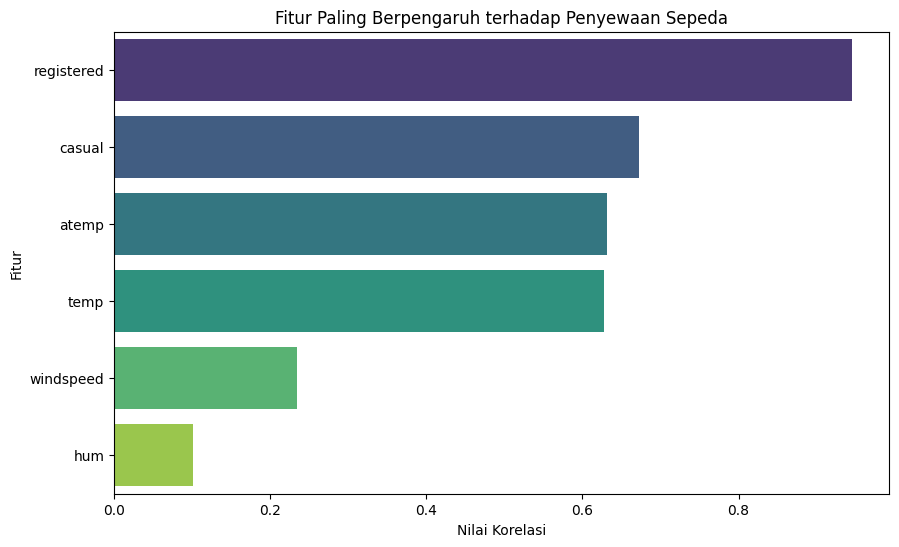

Fitur yang paling berpengaruh terhadap jumlah penyewaan sepeda:
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
windspeed     0.234545
Name: cnt, dtype: float64


In [147]:
selected_features = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

correlation_matrix = day_df[selected_features].corr()

corr_target = correlation_matrix["cnt"].drop("cnt").abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur")
plt.title("Fitur Paling Berpengaruh terhadap Penyewaan Sepeda")
plt.show()

print("Fitur yang paling berpengaruh terhadap jumlah penyewaan sepeda:")
print(corr_target.head(5))

**Insight:**
- Registered memiliki korelasi tertinggi dengan cnt, menunjukkan bahwa sebagian besar penyewaan berasal dari pengguna terdaftar.
- Temp dan atemp berpengaruh positif, artinya suhu yang lebih hangat meningkatkan penyewaan sepeda.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-180-05829052f84b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
<ipython-input-180-05829052f84b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg["weathersit"], y=weather_avg["cnt"], palette="coolwarm")


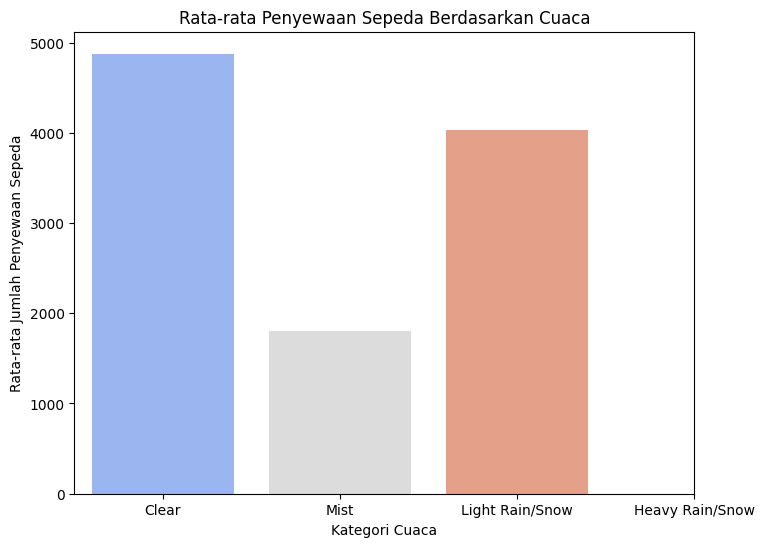

In [180]:
weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_avg["weathersit"], y=weather_avg["cnt"], palette="coolwarm")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Rain/Snow", "Heavy Rain/Snow"])
plt.show()

**Insight:**
- Penyewaan Sepeda Paling Tinggi Saat Cuaca Cerah, ini menunjukkan bahwa pengguna lebih memilih menggunakan sepeda saat kondisi cuaca mendukung dan nyaman.
- Saat hujan atau salju, jumlah penyewaan berkurang karena kondisi jalan yang tidak mendukung.

## Conclusion

- Conclusion pertanyaan 1:
Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?

Faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda adalah registered_day (jumlah pengguna terdaftar), diikuti oleh temp_day (suhu). Ini menunjukkan bahwa penyewaan lebih banyak dilakukan oleh pengguna terdaftar, dan suhu yang lebih hangat meningkatkan permintaan. Sebaliknya, kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil

- Conclusion pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

Cuaca yang buruk dapat mengurangi jumlah pengguna sepeda, sedangkan cuaca cerah menjadi faktor pendukung utama meningkatnya jumlah penyewaan sepeda. Oleh karena itu, penyedia layanan bike-sharing dapat mempertimbangkan strategi seperti diskon atau promo khusus pada hari hujan untuk tetap menarik pengguna.

In [158]:
all_data.to_csv("all_data.csv", index=False)